Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [3]:
# Remove the following columns normalized-losses & symboling
automobiles_df.drop(columns=['normalized-losses', 'symboling'], inplace=True)


#### Remove any duplicate rows

In [4]:
# Original size before dropping
original_rows = automobiles_df.shape[0]

# Create a copy to preserve original for comparison
cleaned_df = automobiles_df.dropna()
cleaned_rows = cleaned_df.shape[0]

# Calculate rows dropped
rows_dropped = original_rows - cleaned_rows
percentage_dropped = (rows_dropped / original_rows) * 100

print(f"Rows dropped: {rows_dropped} ({percentage_dropped:.2f}% of dataset)")
# Remove duplicate rows
automobiles_df.drop_duplicates(inplace=True)


Rows dropped: 0 (0.00% of dataset)


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Remove rows with missing values
automobiles_df.dropna(inplace=True)

Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [6]:
# Identify numeric columns (excluding already dropped columns)
numeric_cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
                'city-mpg', 'highway-mpg', 'price']

# Replace '?' with np.nan for all relevant columns
for col in numeric_cols:
    automobiles_df[col] = automobiles_df[col].replace('?', np.nan)

# Convert columns to float first (to handle NaNs), then to int64 where appropriate
for col in numeric_cols:
    automobiles_df[col] = automobiles_df[col].astype(float)
    automobiles_df[col] = automobiles_df[col].fillna(automobiles_df[col].median())
    # Only convert to int64 if the column should be integer (e.g., not for bore, stroke, compression-ratio)
    if col not in ['bore', 'stroke', 'compression-ratio']:
        automobiles_df[col] = automobiles_df[col].astype(np.int64)

# Check updated data types
print(automobiles_df.dtypes)


make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base             int64
length                 int64
width                  int64
height                 int64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [7]:
# Create a dataframe with all the cars in the "hatchback' category
hatchback_cars = automobiles_df[automobiles_df['body-style'] == 'hatchback']

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some luxury cars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

##### Comparison of Most Expensive and Cheapest Cars
This graph compares the top 5 most expensive cars and the top 5 cheapest cars in the dataset by their price. It helps visualize the price gap between luxury and budget vehicles.
##### Fuel Economy of Most Expensive vs Cheapest Cars
This graph compares the city MPG (miles per gallon) of the top 5 most expensive and cheapest cars. It highlights the difference in fuel efficiency between luxury and economy models.

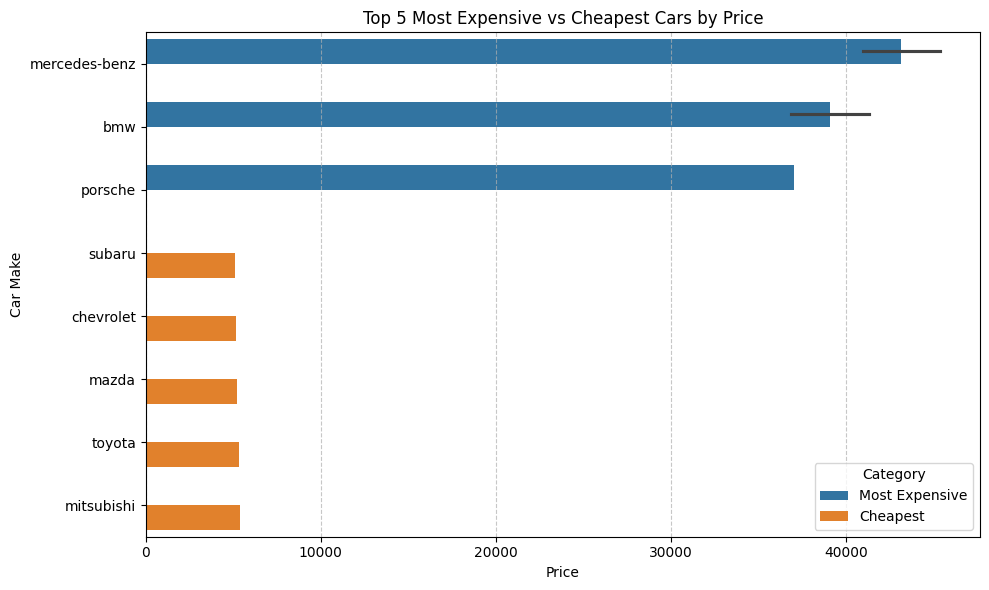

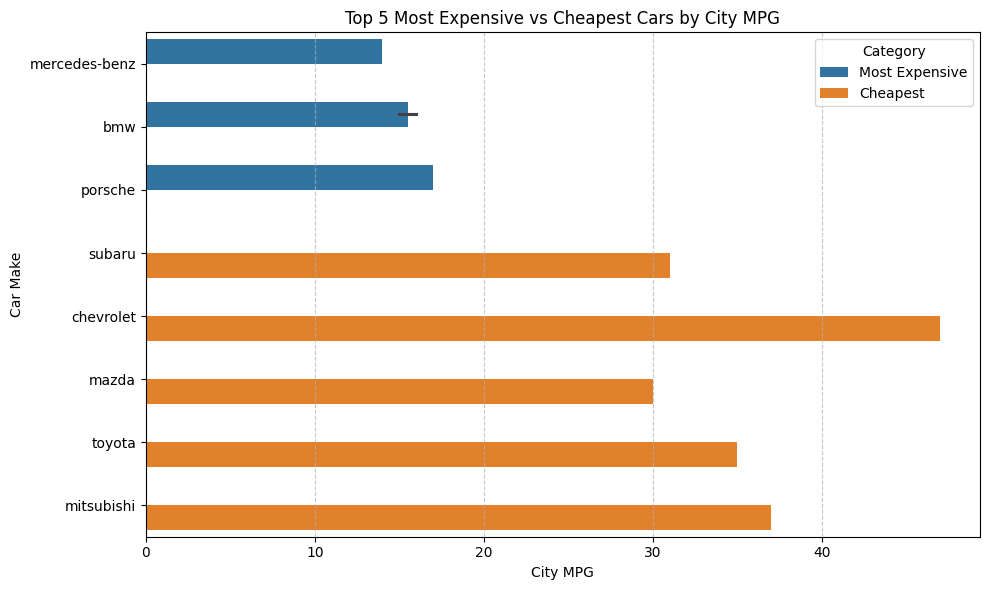

In [8]:
# Identify the 5 most expensive cars
most_expensive_cars = automobiles_df.nlargest(5, 'price')
# Identify the 5 cheapest cars
cheapest_cars = automobiles_df.nsmallest(5, 'price')


# Combine for comparison
top_bottom_cars = pd.concat([
    most_expensive_cars.assign(Category='Most Expensive'),
    cheapest_cars.assign(Category='Cheapest')
])

# Plot grouped horizontal bar chart for price
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_bottom_cars,
    y='make', x='price', hue='Category',
    dodge=True, orient='h', palette=['#1f77b4', '#ff7f0e']
)
plt.title('Top 5 Most Expensive vs Cheapest Cars by Price')
plt.xlabel('Price')
plt.ylabel('Car Make')
plt.legend(title='Category')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Compare mpg as well (city-mpg)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_bottom_cars,
    y='make', x='city-mpg', hue='Category',
    dodge=True, orient='h', palette=['#1f77b4', '#ff7f0e']
)
plt.title('Top 5 Most Expensive vs Cheapest Cars by City MPG')
plt.xlabel('City MPG')
plt.ylabel('Car Make')
plt.legend(title='Category')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

##### Average City MPG by Car Make
This graph shows the average city miles per gallon (MPG) for each car manufacturer, allowing you to compare fuel efficiency across brands.

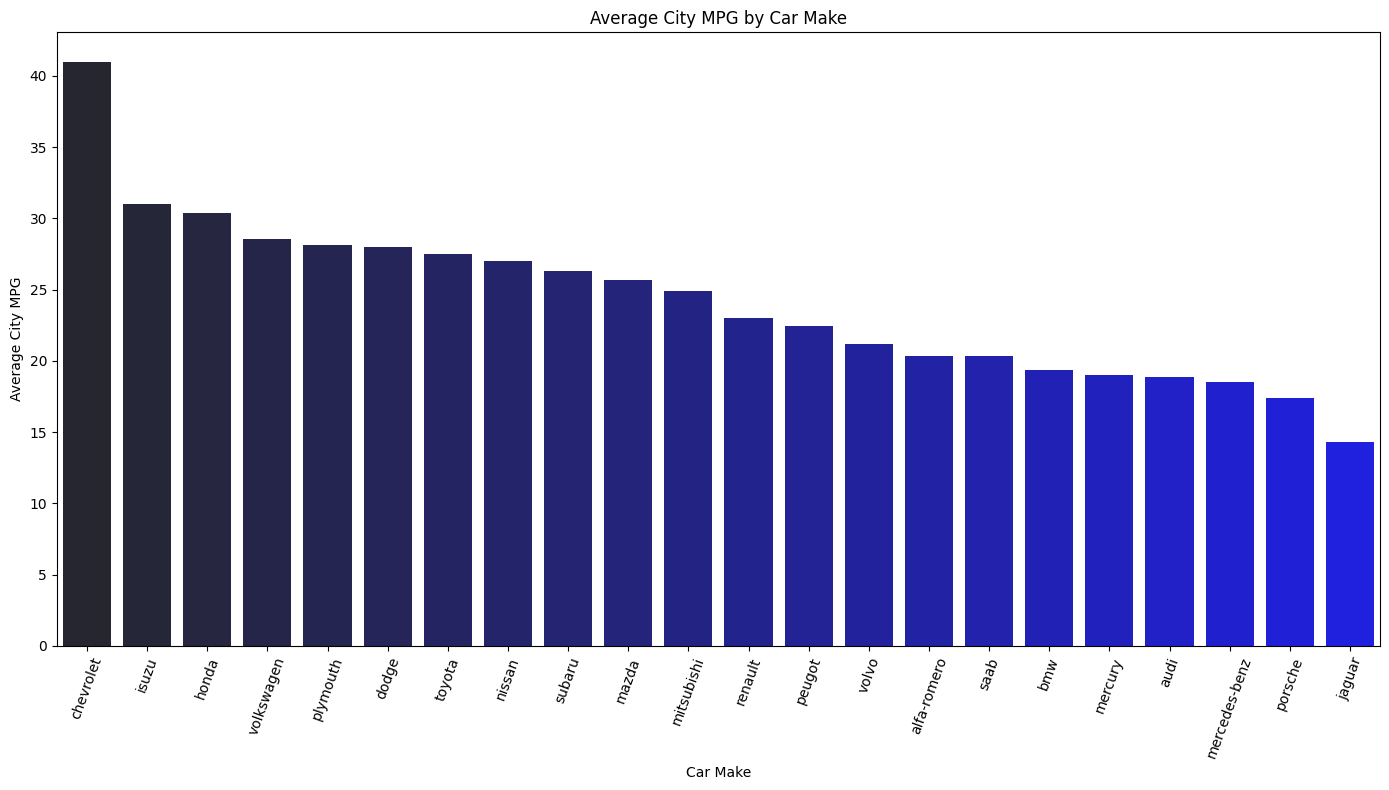

In [9]:
# Compare the mpg for each car make.
# Calculate the average mpg for each car make
average_mpg_by_make = automobiles_df.groupby(
    'make')['city-mpg'].mean().reset_index()
# Sort by city-mpg descending
average_mpg_by_make = average_mpg_by_make.sort_values(
    by='city-mpg', ascending=False)
# Create a bar plot to visualize the average mpg by car make
plt.figure(figsize=(14, 8))
sns.barplot(
    x='make', 
    y='city-mpg', 
    data=average_mpg_by_make, 
    palette = 'dark:blue',
    hue='make'
 )
# Set the title and labels for the plot
plt.title('Average City MPG by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average City MPG')
plt.xticks(rotation=70)
plt.tight_layout()
# Display the plot
plt.show()




#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

##### Largest Engine Size by Body Style
This graph displays the maximum engine size for each body style, helping you compare which types of cars tend to have the largest engines.

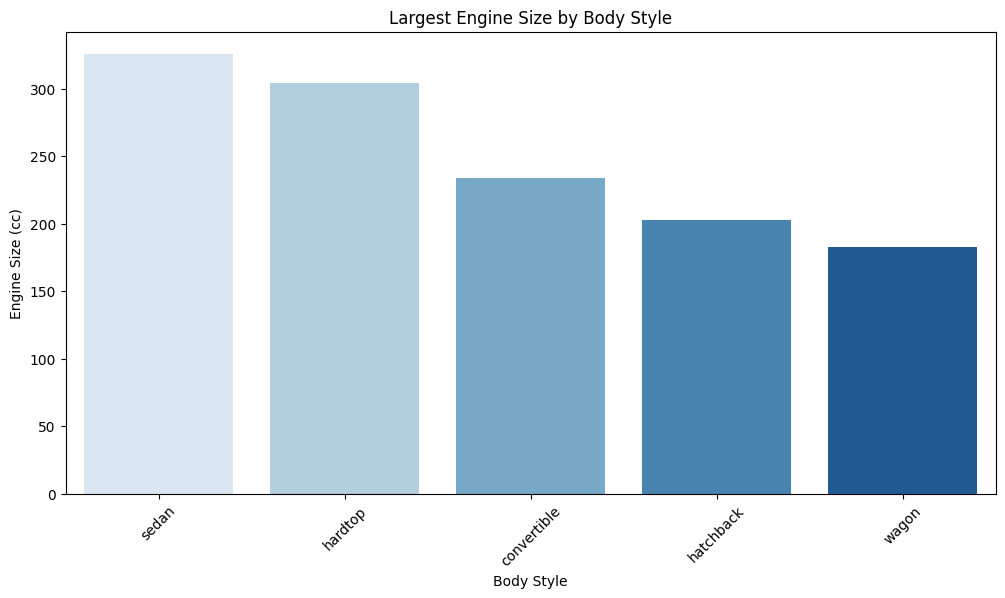

In [10]:
# Identify the vehicle the largest engine size by body style
largest_engine_size = automobiles_df.groupby(
 'body-style')['engine-size'].max().reset_index()
 # Sort by engine size descending
largest_engine_size = largest_engine_size.sort_values(
 by='engine-size', ascending=False)
 # Create a bar plot to visualize the largest engine size by body style
plt.figure(figsize=(12, 6))
sns.barplot(
    x='body-style', 
    y='engine-size', 
    data=largest_engine_size, 
    palette='Blues',
    hue='body-style'
)
 # Set the title and labels for the plot
plt.title('Largest Engine Size by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Engine Size (cc)')
plt.xticks(rotation=45)
# Display the plot
plt.show()


#### Which vehicle manufacturer has the most car models in the dataset

### Top 10 Vehicle Manufacturers by Frequency
This graph shows which car manufacturers have the most models represented in the dataset, highlighting the most common brands.

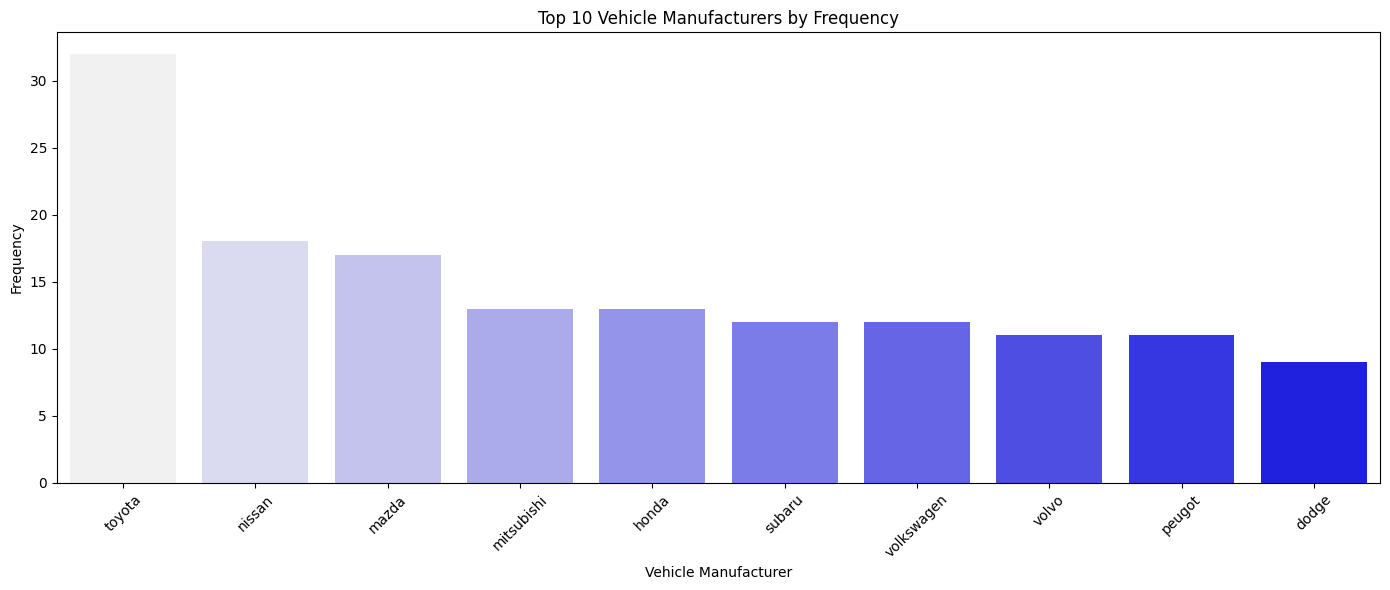

In [11]:
# # Identify the top 10 vehicle manufacturers that appear most frequently in the data
top_10_manufacturers = automobiles_df['make'].value_counts().head(10)
# Create a bar plot to visualize the top 10 vehicle manufacturers in the dataset
plt.figure(figsize=(14, 6))
sns.barplot(
    x=top_10_manufacturers.index, 
    y=top_10_manufacturers.values, 
    palette='light:blue',
    hue=top_10_manufacturers.index
)
# Set the title and labels for the plot
plt.title('Top 10 Vehicle Manufacturers by Frequency')
plt.xlabel('Vehicle Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Display the plot
plt.tight_layout()
plt.show()




### Conclusion

This exploratory data analysis provided valuable insights into the automobile dataset. The data cleaning process ensured the dataset was accurate and ready for analysis. Key findings include:

- There is a significant price gap between luxury and budget vehicles, with brands like Mercedes-Benz, BMW, and Porsche being the most expensive, and brands like Subaru, Chevrolet, Mazda, Toyota, and Mitsubishi being the most affordable.
- Cheaper cars tend to have better fuel efficiency (higher city MPG) compared to luxury vehicles, which often prioritize performance and features over economy.
- Sedan and hardtop body styles generally have the largest engine sizes, while wagons and hatchbacks have smaller engines.
- Toyota, Nissan, and Mazda are the most common manufacturers in the dataset, indicating a wide variety of models from these brands.

Overall, the analysis highlights clear trends in price, fuel efficiency, engine size, and manufacturer representation, providing a solid foundation for further investigation or predictive modeling.

**This report was written by:** Tlotlo Selogilwe.